In [1]:
def read_test_cases_from_txt(file_path):
    test_cases = []
    with open(file_path, 'r') as file:
        while True:
            N, M = map(int, file.readline().strip().split())
            if N == 0 and M == 0:
                break
            roads = []
            for _ in range(M):
                a, b, c = map(int, file.readline().strip().split())
                roads.append((a, b, c))
            test_cases.append({'N': N, 'M': M, 'roads': roads})
    return test_cases
test_cases = read_test_cases_from_txt("./Example_LAB6.txt")

# for i in test_cases:
#     print(i)

In [2]:
# Initialize output list for Two-Pass DFS
output_two_pass_dfs = []

# Two-Pass DFS function to check if a graph is strongly connected
def two_pass_dfs(graph, reversed_graph, start):
    def dfs_single_pass(graph, start, visited):
        visited.add(start)
        for neighbour in graph[start]:
            if neighbour not in visited:
                dfs_single_pass(graph, neighbour, visited)

    visited_first_pass = set()
    dfs_single_pass(graph, start, visited_first_pass)
    
    # Check if all nodes were visited in the first pass
    if len(visited_first_pass) < len(graph):
        return False
    
    # Second DFS pass on the reversed graph
    visited_second_pass = set()
    dfs_single_pass(reversed_graph, start, visited_second_pass)
    
    # Check if all nodes were visited in the second pass
    if len(visited_second_pass) < len(graph):
        return False
    
    return True

# Iterate through each test case
for test in test_cases:
    N = test['N']
    M = test['M']
    roads = test['roads']
    
    # Initialize the original and reversed graphs
    graph = {i: [] for i in range(1, N + 1)}
    reversed_graph = {i: [] for i in range(1, N + 1)}
    
    # Populate the graphs
    for a, b, c in roads:
        graph[a].append(b)
        reversed_graph[b].append(a)
        if c == 2:
            graph[b].append(a)
            reversed_graph[a].append(b)
    
    # Use Two-Pass DFS to check if the graph is strongly connected
    is_fully_connected = two_pass_dfs(graph, reversed_graph, 1)
    
    # Append the result to the output list
    output_two_pass_dfs.append(1 if is_fully_connected else 0)

print(f"ANS: {output_two_pass_dfs}")

ANS: [0, 0, 0, 0, 0]


# GRAPH PLOT

Test Case 1:
Output: 0


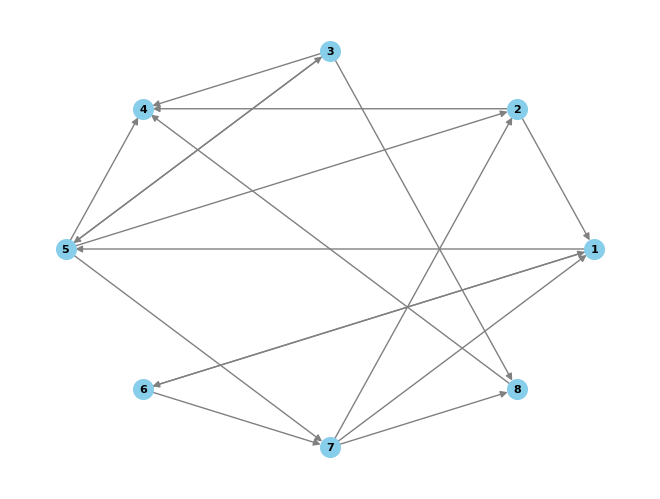

Test Case 2:
Output: 0


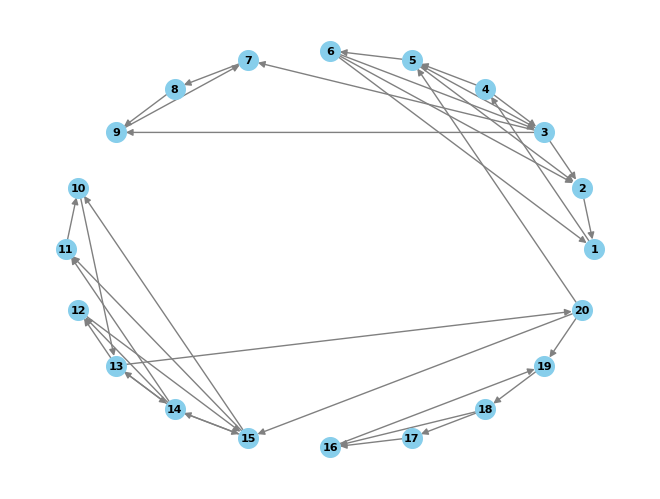

Test Case 3:
Output: 0


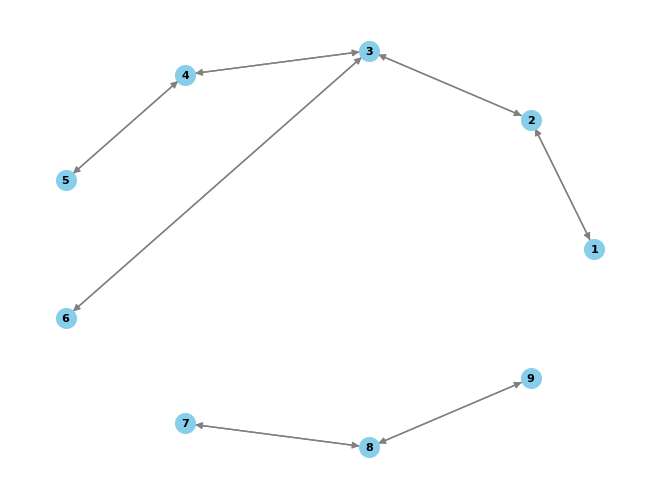

Test Case 4:
Output: 0


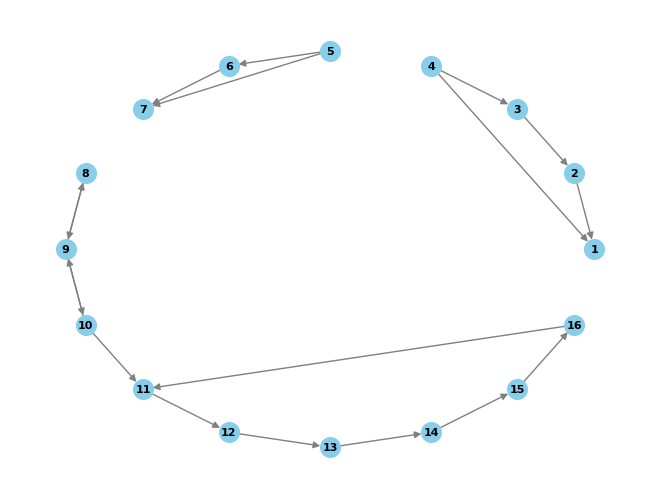

Test Case 5:
Output: 0


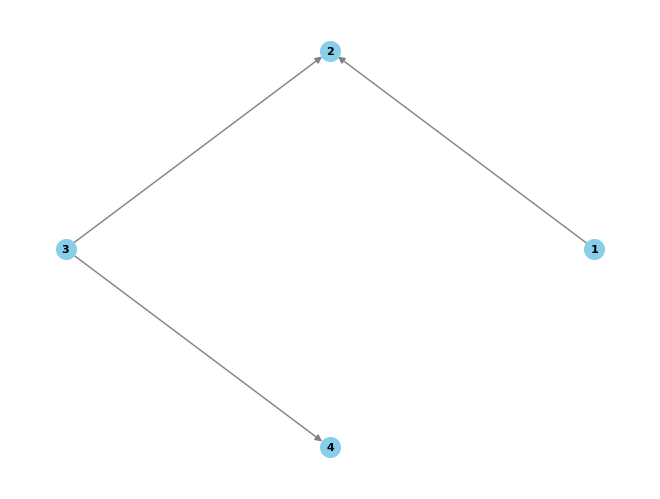

In [3]:
import matplotlib.pyplot as plt
import networkx as nx

# Function to draw a graph based on the given roads (edges) and number of cities (nodes)
def draw_graph(N, roads):
    G = nx.DiGraph()  # Create a directed graph
    for i in range(1, N + 1):
        G.add_node(i)  # Add nodes to the graph

    for a, b, c in roads:
        G.add_edge(a, b)  # Add a directed edge for one-way and two-way roads
        if c == 2:
            G.add_edge(b, a)  # Add the reverse edge for two-way roads

    pos = nx.circular_layout(G)  # Use a circular layout for better visibility
    nx.draw(G, pos, with_labels=True, font_weight='bold', node_color='skyblue', font_size=8, node_size=200, font_color='black', edge_color='gray')
    plt.show()

# Draw graphs for each test case
for i, test in enumerate(test_cases):
    print(f"Test Case {i + 1}:")
    print(f"Output: {output_two_pass_dfs[i]}")
    draw_graph(test['N'], test['roads'])

In [4]:
# Function to perform DFS and populate the finishing times
def dfs_finish_time(graph, node, visited, stack):
    visited.add(node)
    for neighbour in graph[node]:
        if neighbour not in visited:
            dfs_finish_time(graph, neighbour, visited, stack)
    stack.append(node)

# Function to perform DFS and populate a strongly connected component
def dfs_scc(graph, node, visited, scc):
    visited.add(node)
    scc.add(node)
    for neighbour in graph[node]:
        if neighbour not in visited:
            dfs_scc(graph, neighbour, visited, scc)

# Function to find all strongly connected components in a graph
def find_sccs(graph):
    # Step 1: Run DFS on the original graph to get the nodes by finishing time
    visited = set()
    stack = []
    for node in graph:
        if node not in visited:
            dfs_finish_time(graph, node, visited, stack)
            
    # Step 2: Reverse the graph
    reversed_graph = {node: [] for node in graph}
    for node in graph:
        for neighbour in graph[node]:
            reversed_graph[neighbour].append(node)
    
    # Step 3: Run DFS on the reversed graph, considering nodes in decreasing order of finishing time
    visited = set()
    sccs = []
    while stack:
        node = stack.pop()
        if node not in visited:
            scc = set()
            dfs_scc(reversed_graph, node, visited, scc)
            sccs.append(scc)
    
    return sccs

# Initialize a list to store the number of SCCs for each test case
num_sccs_list = []

# Iterate through each test case to find the number of SCCs
for i,test in enumerate(test_cases):
    N = test['N']
    M = test['M']
    roads = test['roads']
    
    # Initialize the graph
    graph = {i: [] for i in range(1, N + 1)}
    
    # Populate the graph
    for a, b, c in roads:
        graph[a].append(b)
        if c == 2:
            graph[b].append(a)
    
    # Find the SCCs for the graph
    sccs = find_sccs(graph)
    
    # Append the number of SCCs to the list
    num_sccs_list.append(len(sccs))
    
    print(f"SCCs in test case {i+1}: {sccs}")
    
print(f"\nNumber of SCCs: {num_sccs_list}")

SCCs in test case 1: [{1, 2, 3, 5, 6, 7}, {8}, {4}]
SCCs in test case 2: [{10, 11, 12, 13, 14, 15, 20}, {16, 17, 18, 19}, {1, 2, 3, 4, 5, 6}, {8, 9, 7}]
SCCs in test case 3: [{8, 9, 7}, {1, 2, 3, 4, 5, 6}]
SCCs in test case 4: [{8, 9, 10}, {11, 12, 13, 14, 15, 16}, {5}, {6}, {7}, {4}, {3}, {2}, {1}]
SCCs in test case 5: [{3}, {4}, {1}, {2}]

Number of SCCs: [3, 4, 2, 9, 4]


Test Case 1:
Number of SCCs: 3


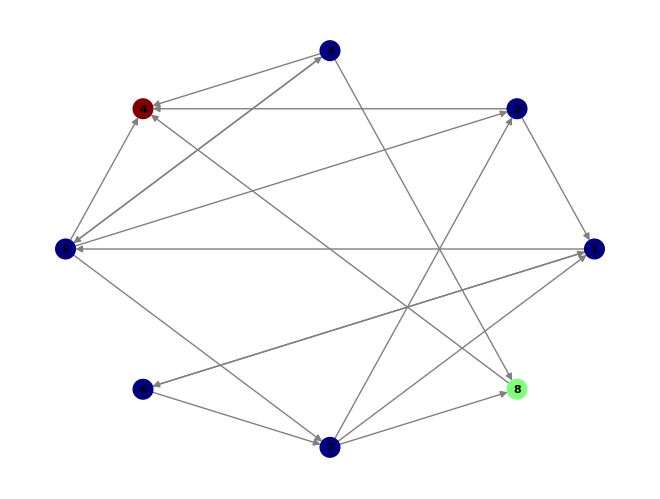

Test Case 2:
Number of SCCs: 4


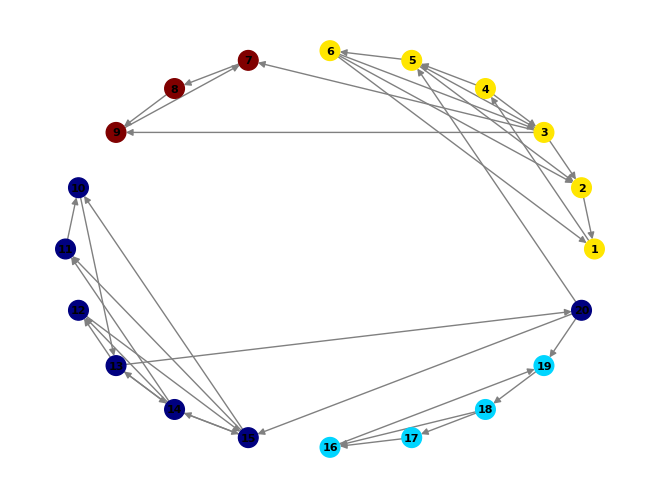

Test Case 3:
Number of SCCs: 2


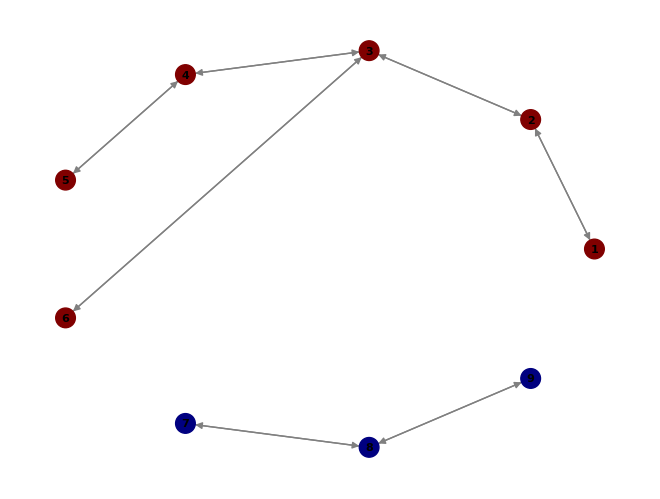

Test Case 4:
Number of SCCs: 9


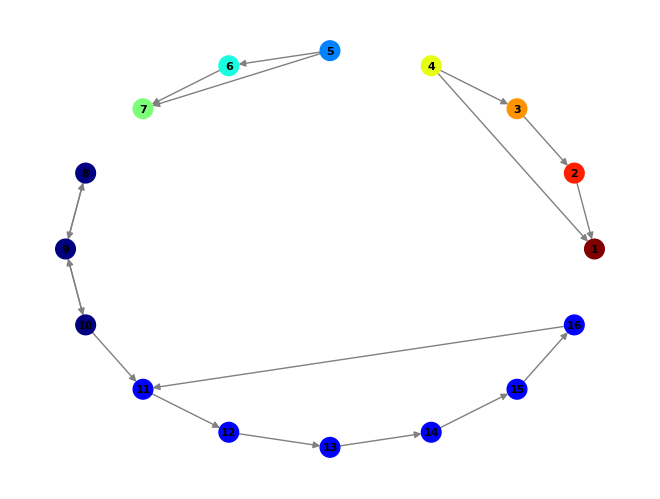

Test Case 5:
Number of SCCs: 4


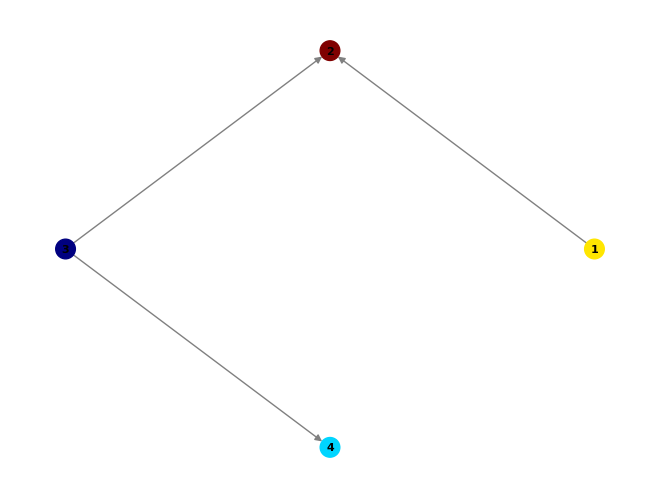

In [5]:
# Function to draw a graph based on the given roads (edges) and number of cities (nodes), and color the SCCs
def draw_graph_with_sccs(N, roads, sccs):
    G = nx.DiGraph()  # Create a directed graph
    for i in range(1, N + 1):
        G.add_node(i)  # Add nodes to the graph

    for a, b, c in roads:
        G.add_edge(a, b)  # Add a directed edge for one-way and two-way roads
        if c == 2:
            G.add_edge(b, a)  # Add the reverse edge for two-way roads

    pos = nx.circular_layout(G)  # Use a circular layout for better visibility
    
    # Create a color map to color nodes in the same SCC with the same color
    color_map = []
    color_idx = 0
    node_to_color = {}
    
    for scc in sccs:
        for node in scc:
            node_to_color[node] = color_idx
        color_idx += 1
    
    for node in G:
        color_map.append(node_to_color.get(node, color_idx))
    
    # Draw the graph
    nx.draw(G, pos, with_labels=True, font_weight='bold', node_color=color_map, font_size=8, node_size=200, font_color='black', edge_color='gray', cmap=plt.cm.jet)
    plt.show()

# Draw graphs with SCCs colored for each test case
for i, test in enumerate(test_cases):
    print(f"Test Case {i + 1}:")
    print(f"Number of SCCs: {num_sccs_list[i]}")
    
    graph = {i: [] for i in range(1, test['N'] + 1)}
    
    for a, b, c in test['roads']:
        graph[a].append(b)
        if c == 2:
            graph[b].append(a)
    
    sccs = find_sccs(graph)
    
    draw_graph_with_sccs(test['N'], test['roads'], sccs)


# find minimum edge to make it strongly connected

Test Case 1:
The number of SCCs: 3
The minimum number of edges needed: 1
Additional edges: [(4, 1)]


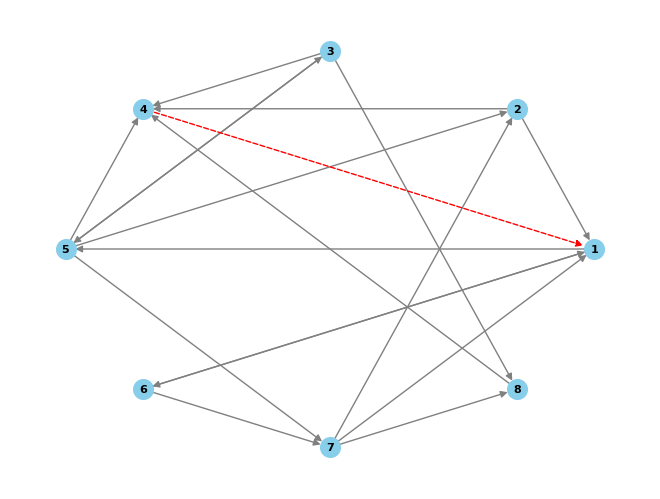

Test Case 2:
The number of SCCs: 4
The minimum number of edges needed: 2
Additional edges: [(16, 10), (8, 10)]


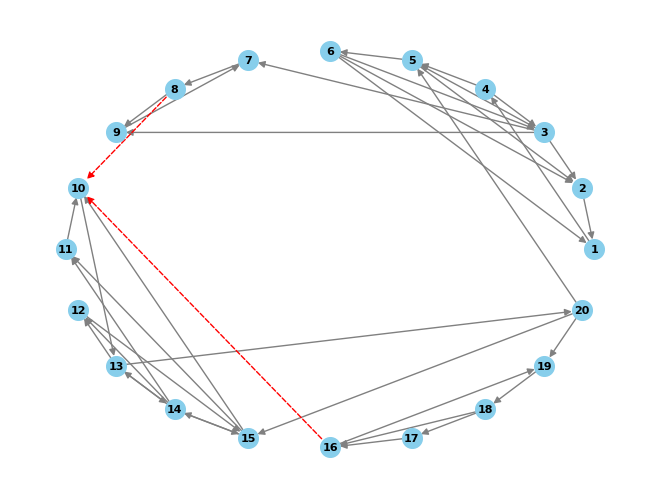

Test Case 3:
The number of SCCs: 2
The minimum number of edges needed: 2
Additional edges: [(1, 8), (8, 1)]


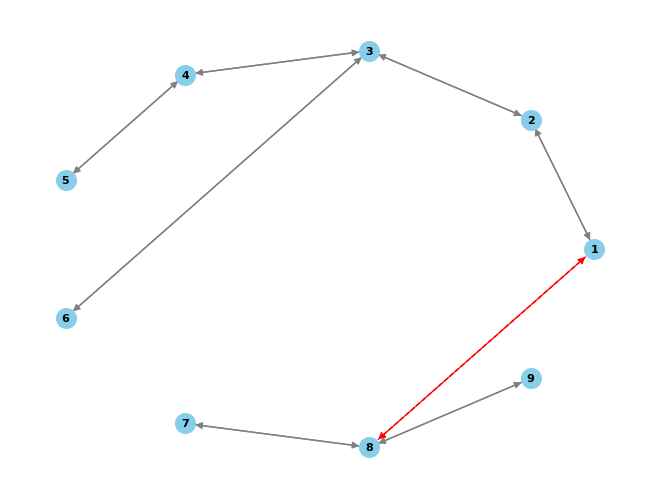

Test Case 4:
The number of SCCs: 9
The minimum number of edges needed: 3
Additional edges: [(11, 8), (7, 8), (1, 8), (11, 5), (7, 5), (1, 5), (11, 4), (7, 4), (1, 4)]


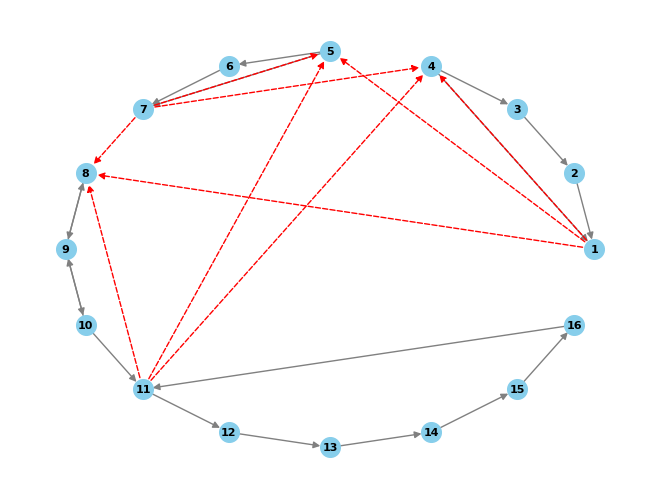

Test Case 5:
The number of SCCs: 4
The minimum number of edges needed: 2
Additional edges: [(4, 3), (2, 3), (4, 1), (2, 1)]


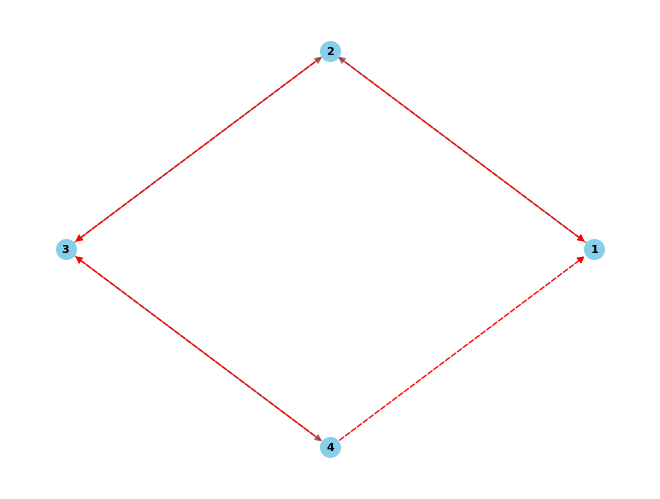

In [6]:
# Function to find the in-degree and out-degree of each SCC in the meta-graph
def find_scc_degrees(graph, sccs):
    in_degree = {i: 0 for i, _ in enumerate(sccs)}
    out_degree = {i: 0 for i, _ in enumerate(sccs)}
    
    # Mapping from original node to its SCC index
    node_to_scc = {}
    for i, scc in enumerate(sccs):
        for node in scc:
            node_to_scc[node] = i
    
    # Populate in_degree and out_degree based on edges in the original graph
    for node in graph:
        scc_from = node_to_scc[node]
        for neighbour in graph[node]:
            scc_to = node_to_scc[neighbour]
            if scc_from != scc_to:
                out_degree[scc_from] += 1
                in_degree[scc_to] += 1
    
    return in_degree, out_degree

# Function to find the minimum number of edges needed to make a graph strongly connected
def find_min_edges_to_scc(graph, sccs):
    in_degree, out_degree = find_scc_degrees(graph, sccs)
    
    num_source_sccs = sum(1 for i in in_degree if in_degree[i] == 0)
    num_sink_sccs = sum(1 for i in out_degree if out_degree[i] == 0)
    
    min_edges_needed = max(num_source_sccs, num_sink_sccs)
    
    if len(sccs) == 1:
        min_edges_needed = 0
    
    return min_edges_needed

# Function to find additional edges to be added to make a graph strongly connected
def find_additional_edges(graph, sccs):
    in_degree, out_degree = find_scc_degrees(graph, sccs)
    additional_edges = []
    for scc_idx in range(len(sccs)):
        if in_degree[scc_idx] == 0:
            for other_scc_idx in range(len(sccs)):
                if out_degree[other_scc_idx] == 0 and scc_idx != other_scc_idx:
                    additional_edges.append((list(sccs[other_scc_idx])[0], list(sccs[scc_idx])[0]))

    return additional_edges

# Function to draw a graph and highlight additional edges needed to make it strongly connected
def draw_graph_and_additional_edges(N, roads, additional_edges):
    G = nx.DiGraph()  # Create a directed graph
    for i in range(1, N + 1):
        G.add_node(i)  # Add nodes to the graph

    for a, b, c in roads:
        G.add_edge(a, b)  # Add a directed edge for one-way and two-way roads
        if c == 2:
            G.add_edge(b, a)  # Add the reverse edge for two-way roads

    pos = nx.circular_layout(G)  # Use a circular layout for better visibility
    nx.draw(G, pos, with_labels=True, font_weight='bold', node_color='skyblue', 
            font_size=8, node_size=200, font_color='black', edge_color='gray')
    
    # Draw additional edges with a different color and style
    nx.draw_networkx_edges(G, pos, edgelist=additional_edges, edge_color='red', style='dashed')
    
    plt.show()

# Initialize a list to store the minimum number of edges needed for each test case
min_edges_list = []
additional_edges_list = []

# Iterate through each test case to find the minimum number of edges needed
for i, test in enumerate(test_cases):
    N = test['N']
    M = test['M']
    roads = test['roads']
    
    graph = {i: [] for i in range(1, N + 1)}
    
    for a, b, c in roads:
        graph[a].append(b)
        if c == 2:
            graph[b].append(a)
    
    sccs = find_sccs(graph)
    
    min_edges_needed = find_min_edges_to_scc(graph, sccs)
    min_edges_list.append(min_edges_needed)
    
    additional_edges = find_additional_edges(graph, sccs)
    additional_edges_list.append(additional_edges)
    
    print(f"Test Case {i + 1}:")
    print(f"The number of SCCs: {num_sccs_list[i]}")
    print(f"The minimum number of edges needed: {min_edges_needed}")
    print(f"Additional edges: {additional_edges}")
    draw_graph_and_additional_edges(N, roads, additional_edges)


In [7]:
# Function to check if adding the additional edges makes the graph strongly connected
def check_strong_connectivity_after_adding_edges(graph, additional_edges):
    # Add the additional edges to the graph
    for a, b in additional_edges:
        graph[a].append(b)
    
    # Find the SCCs for the modified graph
    new_sccs = find_sccs(graph)
    
    # Check if the graph is now strongly connected
    return len(new_sccs) == 1

# Iterate through each test case to check if adding the additional edges makes the graph strongly connected
strongly_connected_after_addition = []

for i, test in enumerate(test_cases):
    N = test['N']
    M = test['M']
    roads = test['roads']
    
    graph = {i: [] for i in range(1, N + 1)}
    
    for a, b, c in roads:
        graph[a].append(b)
        if c == 2:
            graph[b].append(a)
    
    additional_edges = additional_edges_list[i]
    
    # Check if the graph becomes strongly connected after adding the additional edges
    is_strongly_connected = check_strong_connectivity_after_adding_edges(graph, additional_edges)
    strongly_connected_after_addition.append(is_strongly_connected)

print(f"Is the graph strongly connected after adding the additional edges? {strongly_connected_after_addition}")


Is the graph strongly connected after adding the additional edges? [True, True, True, True, True]
